In [13]:
using PyPlot

In [15]:
r60 = digits(60, base=2, pad=8)

8-element Array{Int64,1}:
 0
 0
 1
 1
 1
 1
 0
 0

In [18]:
r60[2]

0

In [5]:
function ruleGen(rule::Int)
    rule = digits(rule, base=2, pad=8)
    rules = Dict{Array{Bool,1}, Bool}()
    
    for i in 0:7
        x = digits(i, base=2, pad=3)
        #println(rule[i+1], " -> ", x)
        rules[[x[3], x[2], x[1]]] = rule[i+1]
    end
    
    return rules
end

ruleGen (generic function with 1 method)

In [78]:
ruleGen(60)

0 -> [0, 0, 0]
0 -> [1, 0, 0]
1 -> [0, 1, 0]
1 -> [1, 1, 0]
1 -> [0, 0, 1]
1 -> [1, 0, 1]
0 -> [0, 1, 1]
0 -> [1, 1, 1]


Dict{Array{Bool,1},Bool} with 8 entries:
  Bool[true, true, false]   => false
  Bool[false, false, false] => false
  Bool[true, false, false]  => true
  Bool[false, true, true]   => true
  Bool[true, false, true]   => true
  Bool[false, false, true]  => false
  Bool[true, true, true]    => false
  Bool[false, true, false]  => true

In [63]:
function CA(rule::Int, seed::Array{Bool,1}, iterations::Int)
    if !(rule >= 0 && rule <= 255)
        error("Incorrect rule [0-255]")
    end
    
    if (iterations < 1)
        error("Must have positive iterations.")
    end
    
    rules = ruleGen(rule)
    
    n = length(seed)
    result = falses(iterations+1, n)
    state = falses(3)
    
    result[1,:] = seed
    
    for it in 2:iterations+1
        for i in 1:n
            left = mod1(i-1, n)
            right = mod1(i+1, n)
            
            state[1] = result[it-1, left]
            state[2] = result[it-1, i]
            state[3] = result[it-1, right]
            
            result[it, i] = rules[state]
        end
    end
    
    return result
end

CA (generic function with 2 methods)

In [7]:
function CA(rule::Int, seed::BitArray{1}, iterations::Int)
    seed = convert(Array{Bool,1}, seed)
    
    return CA(rule, seed, iterations)
end

CA (generic function with 2 methods)

In [64]:
@time r60t = CA(60, [false, true, false, true, false, false, false], 7)

  0.152004 seconds (250.06 k allocations: 12.465 MiB)


8×7 BitArray{2}:
 false   true  false   true  false  false  false
 false   true   true   true   true  false  false
 false   true  false  false  false   true  false
 false   true   true  false  false   true   true
  true   true  false   true  false   true  false
  true  false   true   true   true   true   true
 false   true   true  false  false  false  false
 false   true  false   true  false  false  false

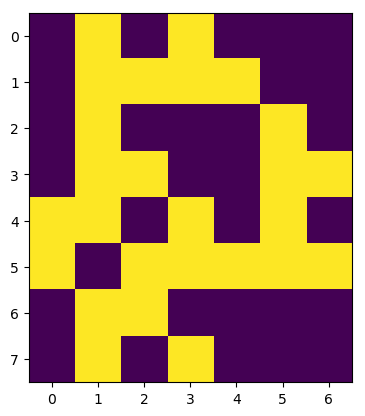

PyObject <matplotlib.image.AxesImage object at 0x7fdf20205320>

In [65]:
imshow(r60t)

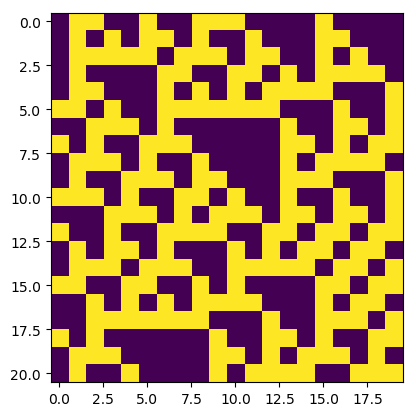

PyObject <matplotlib.image.AxesImage object at 0x7f9e39734a90>

In [95]:
imshow(CA(60, rand(Bool, 20), 20)')

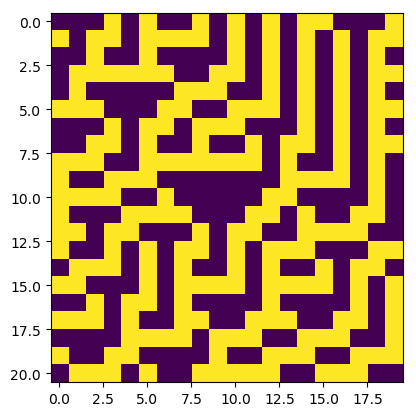

PyObject <matplotlib.image.AxesImage object at 0x7f9e3969cf60>

In [96]:
imshow(CA(30, rand(Bool, 20), 20)')

In [103]:
testca = CA(30, rand(Bool,20), 19)

20×20 BitArray{2}:
  true   true  false   true  false  …   true   true  false   true   true
  true  false   true   true  false     false   true  false  false  false
 false  false   true  false   true     false  false  false   true   true
  true   true   true  false   true     false   true   true   true  false
 false   true  false   true   true      true   true  false   true  false
 false   true  false  false   true  …  false   true  false  false  false
  true   true  false  false   true     false  false  false   true   true
  true  false  false   true   true     false   true   true   true  false
 false   true   true   true  false      true   true  false  false  false
 false  false  false  false  false      true  false   true   true   true
 false   true   true   true   true  …  false  false   true  false   true
  true   true  false   true  false      true   true   true  false  false
 false   true  false  false   true      true  false   true  false  false
 false   true  false  false   tr

In [97]:
typeof(r60t)

BitArray{2}

In [4]:
function resistance(caState::BitArray{2}, resistanceMat::Array{<:Real,2})
    for i in resistanceMat
        if i == 0.0
            error("Resistane matrix must be on positive domain")
        end
    end
    
    if size(caState) != size(resistanceMat)
        error("CA State and Resistance state have size mismatch.")
    end
    
    invsum = Float64(0.0)
    
    for i in 1:length(resistanceMat)
        if caState[i]
            invsum += 1/resistanceMat[i]
        end
    end
    
    if invsum != 0
        return 1/invsum
    else
        return Inf
    end
end

resistance (generic function with 1 method)

In [102]:
testR = ones(20,20) .* 4000

20×20 Array{Float64,2}:
 4000.0  4000.0  4000.0  4000.0  4000.0  …  4000.0  4000.0  4000.0  4000.0
 4000.0  4000.0  4000.0  4000.0  4000.0     4000.0  4000.0  4000.0  4000.0
 4000.0  4000.0  4000.0  4000.0  4000.0     4000.0  4000.0  4000.0  4000.0
 4000.0  4000.0  4000.0  4000.0  4000.0     4000.0  4000.0  4000.0  4000.0
 4000.0  4000.0  4000.0  4000.0  4000.0     4000.0  4000.0  4000.0  4000.0
 4000.0  4000.0  4000.0  4000.0  4000.0  …  4000.0  4000.0  4000.0  4000.0
 4000.0  4000.0  4000.0  4000.0  4000.0     4000.0  4000.0  4000.0  4000.0
 4000.0  4000.0  4000.0  4000.0  4000.0     4000.0  4000.0  4000.0  4000.0
 4000.0  4000.0  4000.0  4000.0  4000.0     4000.0  4000.0  4000.0  4000.0
 4000.0  4000.0  4000.0  4000.0  4000.0     4000.0  4000.0  4000.0  4000.0
 4000.0  4000.0  4000.0  4000.0  4000.0  …  4000.0  4000.0  4000.0  4000.0
 4000.0  4000.0  4000.0  4000.0  4000.0     4000.0  4000.0  4000.0  4000.0
 4000.0  4000.0  4000.0  4000.0  4000.0     4000.0  4000.0  4000.0  4000.0
 

In [104]:
resistance(testca, testR)

19.607843137254886

In [107]:
full_On = trues(20,20);
full_Off = falses(20,20);

In [108]:
resistance(full_On, testR)

9.999999999999993

In [110]:
resistance(full_Off, testR)

Inf

In [114]:
randR = 4000 .* rand(20,20) .+ 4000;

In [116]:
resistance(full_On, randR)

14.458441607824945

In [117]:
resistance(full_Off, randR)

Inf

In [118]:
resistance(testca, randR)

28.293957035522673

# XOR verification

In [3]:
null = falses(8); a = falses(8); b = falses(8); ab = falses(8)
a[1] = true
b[2] = true
ab[1:2] .= true

2-element view(::BitArray{1}, 1:2) with eltype Bool:
 true
 true

In [8]:
function test_XOR_resistances(rmat::Array{<:Real,2})
    null = falses(8); a = falses(8); b = falses(8); ab = falses(8)
    a[1] = true
    b[2] = true
    ab[1:2] .= true
    
    rule = 60
    ca_null = CA(60, null, 7)
    ca_a = CA(60, a, 7)
    ca_b = CA(60, b, 7)
    ca_ab = CA(60, ab, 7)
    
    return [resistance(ca_null, rmat), resistance(ca_a, rmat), resistance(ca_b, rmat), resistance(ca_ab, rmat)]
end

test_XOR_resistances (generic function with 1 method)

In [9]:
test_XOR_resistances(4000 .* rand(8,8) .+ 4000)

4-element Array{Float64,1}:
 Inf               
 234.95586020465754
 222.6864739384345 
 237.56518199675043

In [56]:
    null = falses(8); a = falses(8); b = falses(8); ab = falses(8)
    a[1] = true
    b[2] = true
    ab[1:2] .= true
    
    rule = 60
    ca_null = CA(rule, null, 7)
    ca_a = CA(rule, a, 7)
    ca_b = CA(rule, b, 7)
    ca_ab = CA(rule, ab, 7)

8×8 BitArray{2}:
  true  false  false  false  false  false  false  false
  true  false   true  false  false  false  false  false
 false  false  false  false  false  false  false  false
 false   true   true   true   true  false  false  false
 false  false  false   true  false   true  false  false
 false  false  false   true   true   true   true  false
 false  false  false  false   true  false   true  false
 false  false  false  false  false   true  false   true

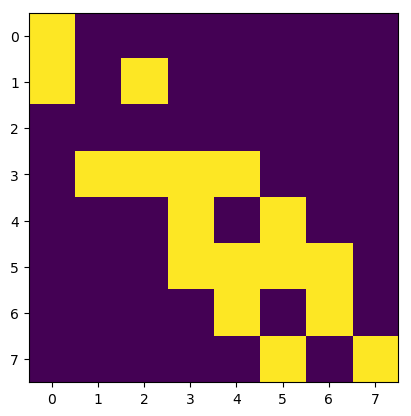

PyObject <matplotlib.image.AxesImage object at 0x7fdf2a443320>

In [57]:
imshow(ca_a)

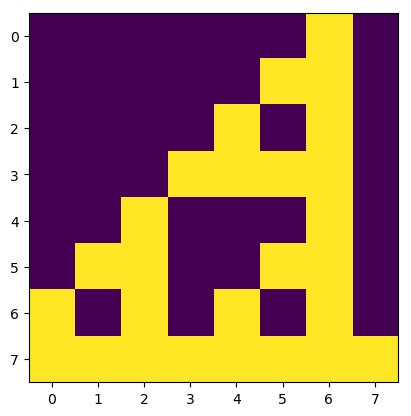

PyObject <matplotlib.image.AxesImage object at 0x7fdf5c539208>

In [43]:
imshow(rotr90(ca_b))

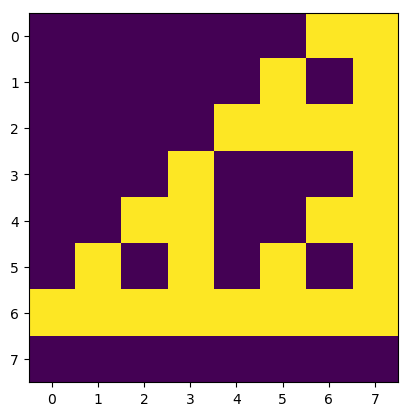

PyObject <matplotlib.image.AxesImage object at 0x7fdf5c50ad68>

In [45]:
imshow(rotr90(ca_ab))

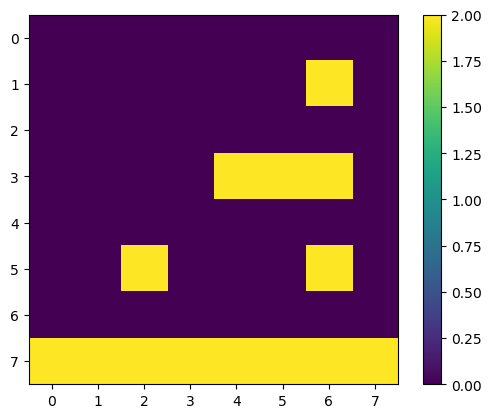

PyObject <matplotlib.colorbar.Colorbar object at 0x7fdf2a610cf8>

In [46]:
imshow(rotr90(ca_a .+ ca_b .- ca_ab))
colorbar()

Random -> OR

In [126]:
xor_R = 100000 .* ones(8,8);
xor_R[2,2] = 4000
xor_R[1,3] = 4000

4000

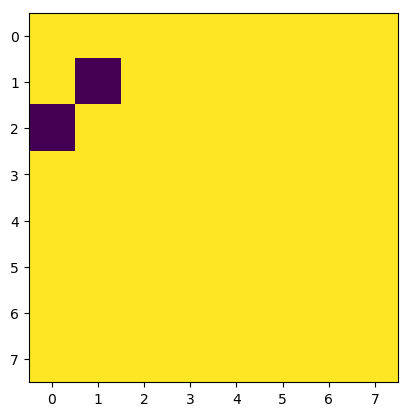

┌ Warning: The default `strides(a::AbstractArray)` implementation is deprecated for general arrays.
│ Specialize `strides(::LinearAlgebra.Adjoint)` if `LinearAlgebra.Adjoint` indeed uses a strided representation in memory.
│ Warning: inappropriately implementing this method for an array type that does not use strided
│ storage may lead to incorrect results or segfaults.
│   caller = stride at abstractarray.jl:350 [inlined]
└ @ Core ./abstractarray.jl:350


PyObject <matplotlib.image.AxesImage object at 0x7f9e395ee630>

In [129]:
imshow(xor_R')

In [137]:
test_XOR_resistances(Matrix(transpose(xor_R)))

4-element Array{Float64,1}:
  Inf              
 1960.784313725488 
 1960.7843137254877
 3846.1538461538457

In [138]:
xor_R = 100000 .* ones(8,8);
xor_R[2,2] = 4000
xor_R[1,3] = 4000
xor_R[4,4] = 4000
xor_R[2,5] = 4000
xor_R[3,6] = 4000
xor_R[3,7] = 4000

4000

In [52]:
xor_R2 = 100000 .* ones(8,8);
xor_R2[:,8] .= 4000

8-element view(::Array{Float64,2}, :, 8) with eltype Float64:
 4000.0
 4000.0
 4000.0
 4000.0
 4000.0
 4000.0
 4000.0
 4000.0

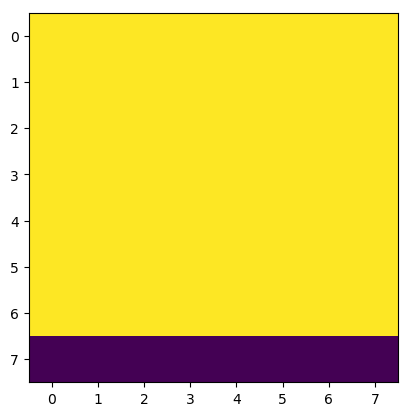

PyObject <matplotlib.image.AxesImage object at 0x7fdf2a464048>

In [53]:
imshow(rotr90(xor_R2))

In [54]:
test_XOR_resistances(xor_R2)

4-element Array{Float64,1}:
  Inf               
  456.62100456621005
  456.62100456621005
 3846.1538461538457 

In [143]:
r_range = [resistance(CA(60, convert(Array{Bool,1}, digits(i, base=2, pad=8)), 7), xor_R) for i in 0:255];

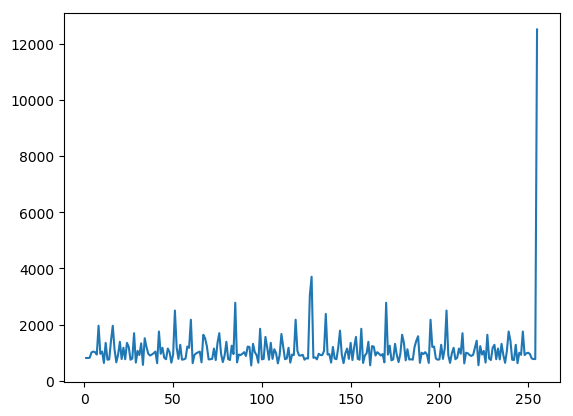

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f9e395389b0>

In [144]:
plot(r_range)

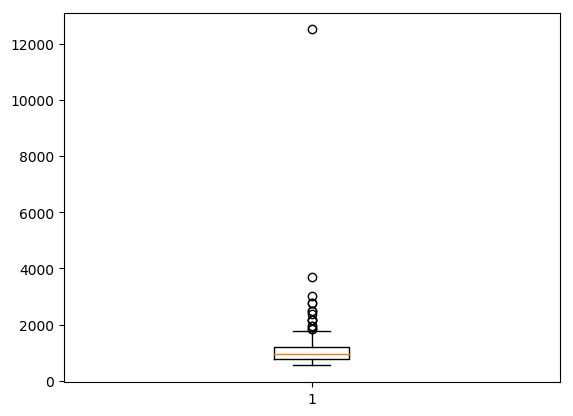

Dict{Any,Any} with 6 entries:
  "means"    => Any[]
  "whiskers" => PyCall.PyObject[PyObject <matplotlib.lines.Line2D object at 0x7…
  "fliers"   => PyCall.PyObject[PyObject <matplotlib.lines.Line2D object at 0x7…
  "boxes"    => PyCall.PyObject[PyObject <matplotlib.lines.Line2D object at 0x7…
  "caps"     => PyCall.PyObject[PyObject <matplotlib.lines.Line2D object at 0x7…
  "medians"  => PyCall.PyObject[PyObject <matplotlib.lines.Line2D object at 0x7…

In [146]:
boxplot(r_range)

In [145]:
extrema(r_range)

(546.4480874316937, Inf)